# Myocardial Infarction Complications Prediction - Data Preparation Lab
**Authors**: Majd Zarai, Cherif Chebbi, Nada Saidi, Nour Chaabani, Youssef Maghraoui, Khalil Bedoui    
**Date**: October 21, 2024

Data preparation is a crucial step in every data-driven project, significantly impacting the performance of models and the overall success of analysis. This notebook covers the data preparation process for predicting complications arising from myocardial infarction using the provided dataset.

### Objectives:
1. Explore and visualize the dataset.
2. Apply data cleaning and transformation techniques, including:
   - Handling missing values.
   - Detecting and treating outliers.
   - Transforming categorical and numerical features.
   - Feature engineering (if necessary).
3. Prepare the cleaned data for modeling.


## Data Understanding


In [90]:
import pandas as pd

# Load the dataset into our jupyter notebook 
data = pd.read_csv('datasetML.csv')

# Display the first 5 rows of the dataset
data.head()


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Display the last 5 rows in our dataset
data.tail()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [92]:
# display the shape of our dataset 
data.shape

(1700, 123)

In [93]:
# display basic information about our dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [94]:
# Display statistical summary of our dataset 
data.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Interpretation of Data Understanding 


1. **Shape**:  
   - The dataset contains **1700 rows** and **123 columns**, indicating that there are **1700 patient records** and **123 features** describing various aspects of their medical history and conditions.

2. **Info**:  
   - The `info()` function provides an overview of the dataset, including:
     - Data types of each column (e.g., `float64` for continuous features, `int64` for discrete features).
     - Memory usage of **1.6 MB**, indicating that the dataset is manageable in size.

3. **Describe**:  
   - The `describe()` function provides statistical summaries of the numerical features, including:
     - **Mean**
     - **Standard Deviation (std)**
     - **Minimum (min) and Maximum (max)**
     - **25%, 50%, 75% quartiles**
     - The average age (`AGE`) is **61.86 years**, with a standard deviation of **11.26**, indicating that most patients are aged between **50 and 70 years**.
     - `INF_ANAM` (history of infarctions) has a mean value of **0.55**, suggesting that a majority of patients have had either zero or one infarction in the past.

4. **Tail**:  
   - Viewing the last few rows helps in understanding how the dataset ends.


## Data Exploration

### Categorical Features Exploration
We analyze the following categorical features in detail:
- **`SEX`**: Gender of the patients.
- **`INF_ANAM`**: Number of previous myocardial infarctions.
- **`STENOK_AN`**: History of exertional angina pectoris.
- **`FK_STENOK`**: Functional class of angina pectoris.

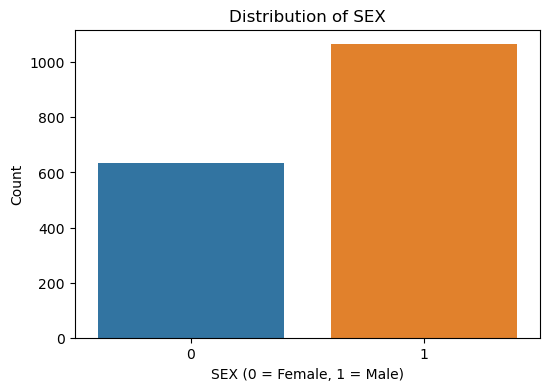

In [95]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the 'SEX' feature
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='SEX')
plt.title('Distribution of SEX')
plt.xlabel('SEX (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


- **`SEX`**: The plot shows the distribution of male and female patients. Most of the patients in this dataset are male (`1`), which could be important for considering gender-based risk factors in myocardial infarction complications.


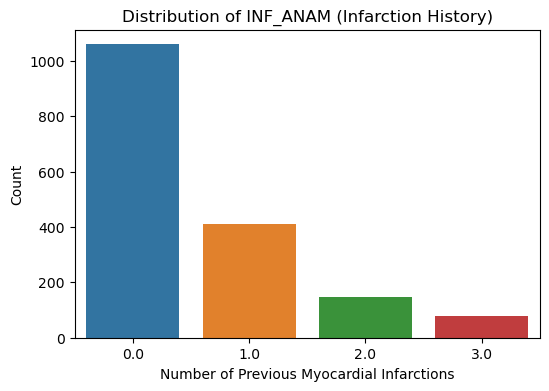

In [96]:
# Visualizing the 'INF_ANAM' feature
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='INF_ANAM')
plt.title('Distribution of INF_ANAM (Infarction History)')
plt.xlabel('Number of Previous Myocardial Infarctions')
plt.ylabel('Count')
plt.show()


- **`INF_ANAM`**: The plot shows that the majority of patients have **zero or one** previous infarction

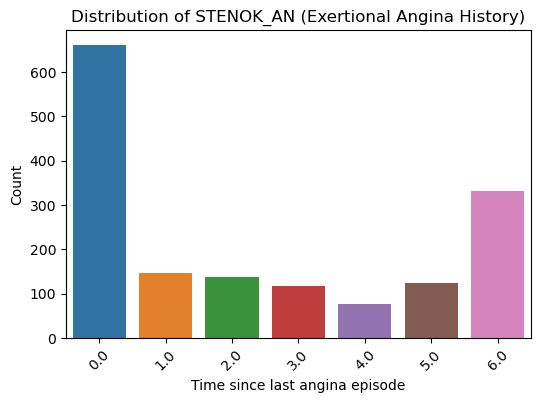

In [97]:
# Visualizing the 'STENOK_AN' feature
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='STENOK_AN')
plt.title('Distribution of STENOK_AN (Exertional Angina History)')
plt.xlabel('Time since last angina episode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- **`STENOK_AN`**: This plot reveals a varied history of exertional angina among patients, indicating that most had a recent angina episode within the last few years.


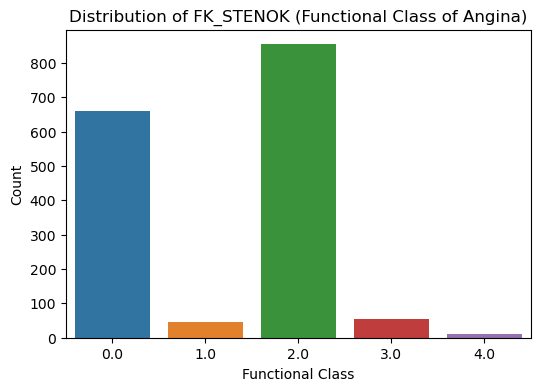

In [98]:
# Visualizing the 'FK_STENOK' feature
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='FK_STENOK')
plt.title('Distribution of FK_STENOK (Functional Class of Angina)')
plt.xlabel('Functional Class')
plt.ylabel('Count')
plt.show()


- **`FK_STENOK`**: The plot shows that the majority of patients fall into lower functional classes (`0-2`), indicating less severe angina.


### Summary of Categorical Features Exploration
The individual plots provide insights into the distribution of each categorical feature, highlighting the variations among patients in terms of their gender, medical history, and hypertension status. These visualizations help in understanding the diversity in the patient population, which is crucial for building accurate models.


### Integer Features Exploration
Integer features include continuous numerical data such as **age** :
- **`AGE`**: Age of the patient.

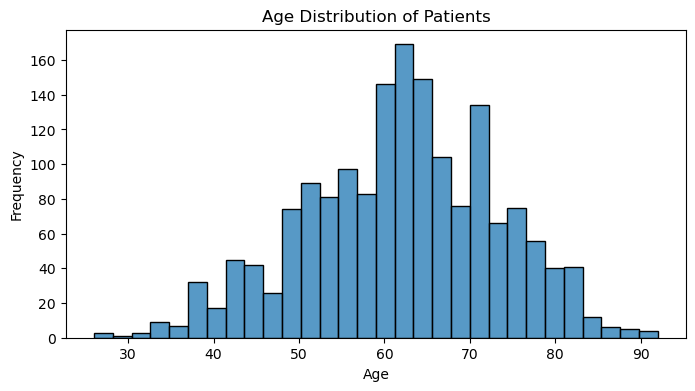

In [99]:
# Visualizing the 'Age' Distibution
plt.figure(figsize=(8, 4))
sns.histplot(data['AGE'], bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Preparation
Data preparation involves cleaning and transforming data to make it suitable for building predictive models. This step includes:
1. Handling missing values.
2. Detecting and treating outliers.
3. Transforming categorical features.
4. Transforming numerical features to improve distribution.
5. Feature engineering, if necessary.


### 1.Handling Missing Values
Missing values in a dataset can significantly impact the performance of a model if not handled properly. This step focuses on identifying columns with missing values and applying appropriate imputation strategies to ensure the dataset is complete and ready for further analysis.

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
AGE                 8
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im             80
inf

In [102]:
percentage= data.isnull().mean() *100
percentage

AGE               0.470588
SEX               0.000000
INF_ANAM          0.235294
STENOK_AN         6.235294
FK_STENOK         4.294118
IBS_POST          3.000000
IBS_NASL         95.764706
GB                0.529412
SIM_GIPERT        0.470588
DLIT_AG          14.588235
ZSN_A             3.176471
nr_11             1.235294
nr_01             1.235294
nr_02             1.235294
nr_03             1.235294
nr_04             1.235294
nr_07             1.235294
nr_08             1.235294
np_01             1.058824
np_04             1.058824
np_05             1.058824
np_07             1.058824
np_08             1.058824
np_09             1.058824
np_10             1.058824
endocr_01         0.647059
endocr_02         0.588235
endocr_03         0.588235
zab_leg_01        0.411765
zab_leg_02        0.411765
zab_leg_03        0.411765
zab_leg_04        0.411765
zab_leg_06        0.411765
S_AD_KBRIG       63.294118
D_AD_KBRIG       63.294118
S_AD_ORIT        15.705882
D_AD_ORIT        15.705882
O

I have identified the columns with missing values and their respective percentages. Several columns, such as KFK_BLOOD and IBS_NASL, have a very high percentage of missing data, which might necessitate either imputation with specific values (e.g., mean or median) or removal if they are not critical for the analysis.

#### Suggested Approach for Handling Missing Values:
###### Columns with High Missing Rates (>40%):
Consider dropping these columns if they are not critical for analysis or modeling, as imputing such a high percentage may introduce noise.


In [103]:
# Identify columns with more than 40% missing values
columns_to_drop = percentage[percentage > 40].index
columns_to_drop

Index(['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NOT_NA_KB'], dtype='object')

In [104]:
data = data.drop(columns=columns_to_drop)

In [105]:
data.isnull().sum()

AGE                8
SEX                0
INF_ANAM           4
STENOK_AN        106
FK_STENOK         73
IBS_POST          51
GB                 9
SIM_GIPERT         8
DLIT_AG          248
ZSN_A             54
nr_11             21
nr_01             21
nr_02             21
nr_03             21
nr_04             21
nr_07             21
nr_08             21
np_01             18
np_04             18
np_05             18
np_07             18
np_08             18
np_09             18
np_10             18
endocr_01         11
endocr_02         10
endocr_03         10
zab_leg_01         7
zab_leg_02         7
zab_leg_03         7
zab_leg_04         7
zab_leg_06         7
S_AD_ORIT        267
D_AD_ORIT        267
O_L_POST          12
K_SH_POST         15
MP_TP_POST        14
SVT_POST          12
GT_POST           12
FIB_G_POST        12
ant_im            83
lat_im            80
inf_im            80
post_im           72
IM_PG_P            1
ritm_ecg_p_01    152
ritm_ecg_p_02    152
ritm_ecg_p_04

- The output shows which columns contain missing values and how many values are missing in each.
- We need to apply different strategies for imputation depending on whether the feature is **categorical**, **binary**, or **integer**.


With a dataset containing 123 columns, it's important to automate the process of identifying missing values and applying the right imputation method. This approach categorizes columns automatically and then applies the appropriate imputation strategy based on their types:

#### Strategy:
1. **Identify columns with missing values**.
2. **Manually categorize columns based on the dataset description** into types: categorical, binary, integer, and continuous.
3. **Impute missing values** using the appropriate strategy for each type:
   - **Categorical**: Use the **mode** (most frequent value).
   - **Binary**: Use the **mode** or fill with **0/1** based on the context.
   - **Integer**: Use the **median**.
   - **Continuous**: Use the **mean**.

In [106]:
# Step 1: Define numerical columns that should be treated as categorical based on the description of our dataset
numerical_as_categorical = ['STENOK_AN', 'INF_ANAM', 'FK_STENOK', 'IBS_POST', 'GB', 'DLIT_AG', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NOT_NA_1_n', 'LET_IS'] 

In [107]:
# Step 2: Manually categorize other columns based on the dataset description
categorical_columns = numerical_as_categorical
binary_columns = ['SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']
integer_columns = ['AGE',  'S_AD_ORIT', 'D_AD_ORIT', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n']
continuous_columns = ['K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']

In [108]:
# Step 3: Impute missing values
# Impute missing values for categorical features using the mode (most frequent value)
for column in numerical_as_categorical:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [109]:
# Impute missing values for binary features using the mode (most frequent value)
for column in binary_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [110]:
# Impute missing values for integer-based features using the mean
for column in integer_columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [111]:
# Impute missing values for continuous features using the mean
for column in continuous_columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [112]:
data.isnull().sum()

AGE              0
SEX              0
INF_ANAM         0
STENOK_AN        0
FK_STENOK        0
IBS_POST         0
GB               0
SIM_GIPERT       0
DLIT_AG          0
ZSN_A            0
nr_11            0
nr_01            0
nr_02            0
nr_03            0
nr_04            0
nr_07            0
nr_08            0
np_01            0
np_04            0
np_05            0
np_07            0
np_08            0
np_09            0
np_10            0
endocr_01        0
endocr_02        0
endocr_03        0
zab_leg_01       0
zab_leg_02       0
zab_leg_03       0
zab_leg_04       0
zab_leg_06       0
S_AD_ORIT        0
D_AD_ORIT        0
O_L_POST         0
K_SH_POST        0
MP_TP_POST       0
SVT_POST         0
GT_POST          0
FIB_G_POST       0
ant_im           0
lat_im           0
inf_im           0
post_im          0
IM_PG_P          0
ritm_ecg_p_01    0
ritm_ecg_p_02    0
ritm_ecg_p_04    0
ritm_ecg_p_06    0
ritm_ecg_p_07    0
ritm_ecg_p_08    0
n_r_ecg_p_01     0
n_r_ecg_p_02

After handling missing values, we will continue with the following steps to prepare the data for analysis:

### 2.Detect and Treat Outliers

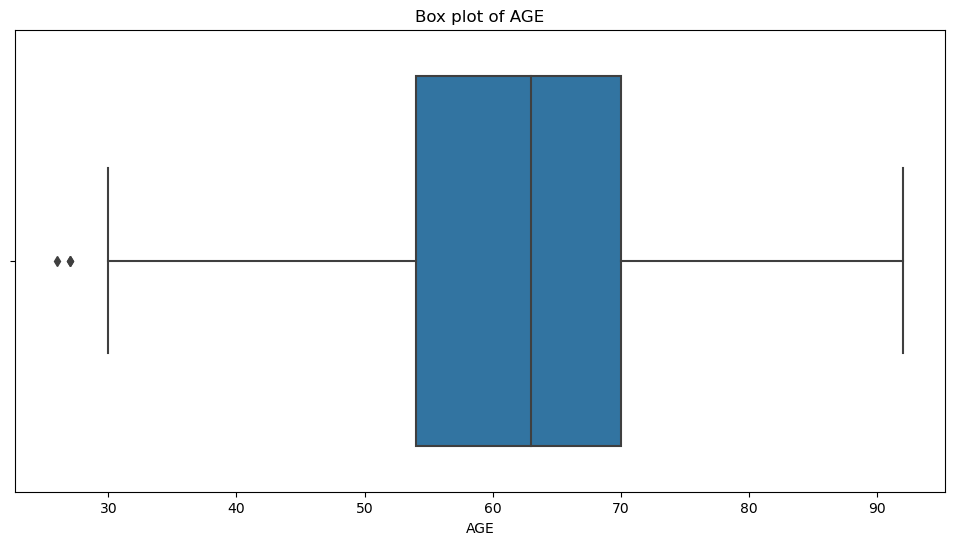

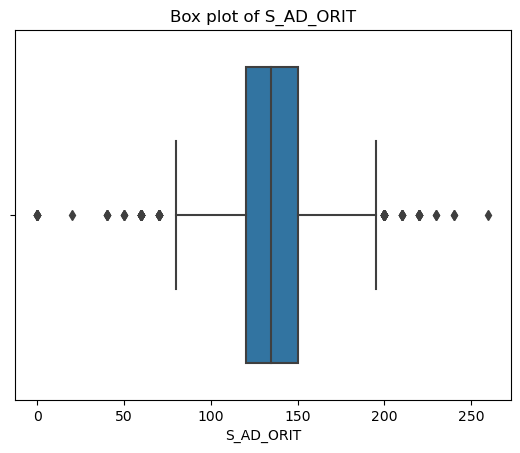

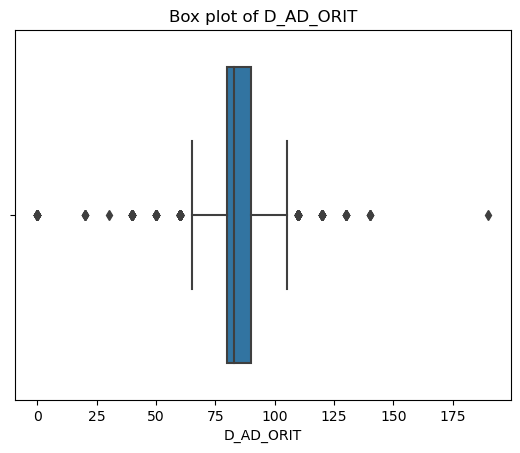

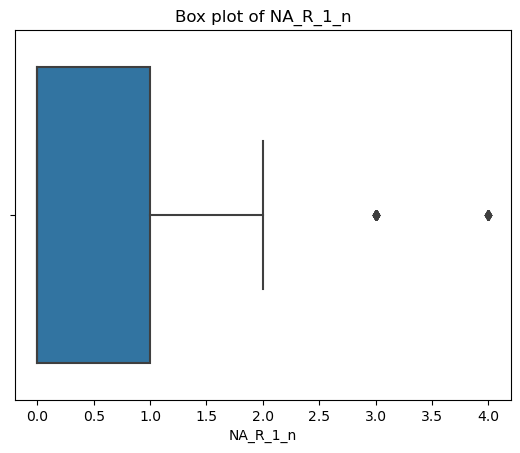

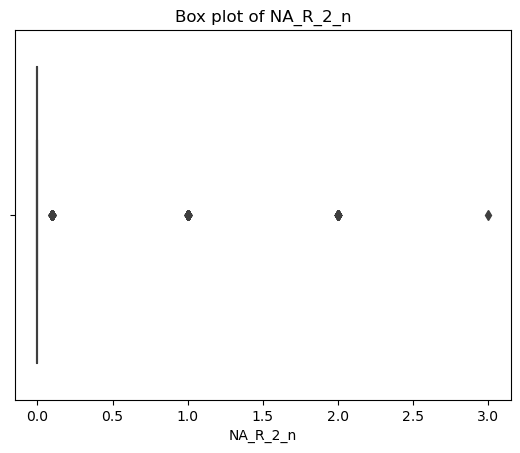

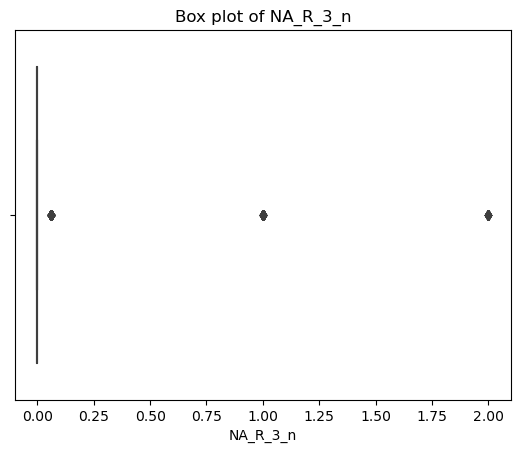

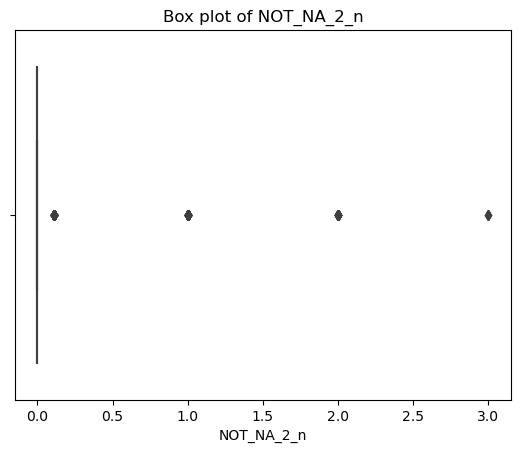

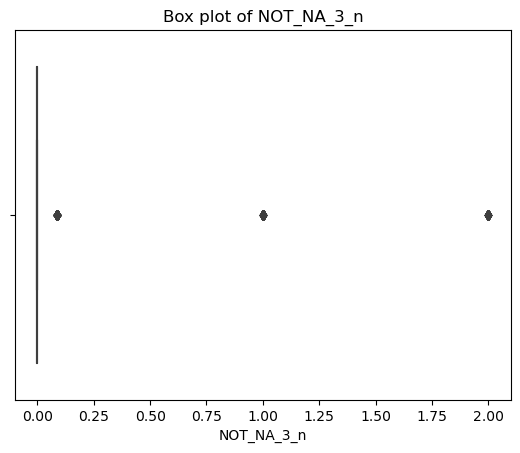

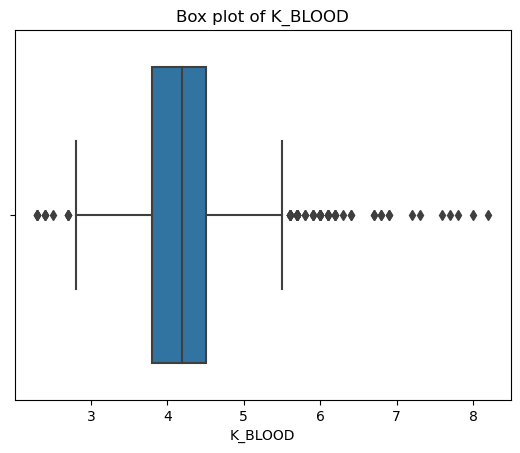

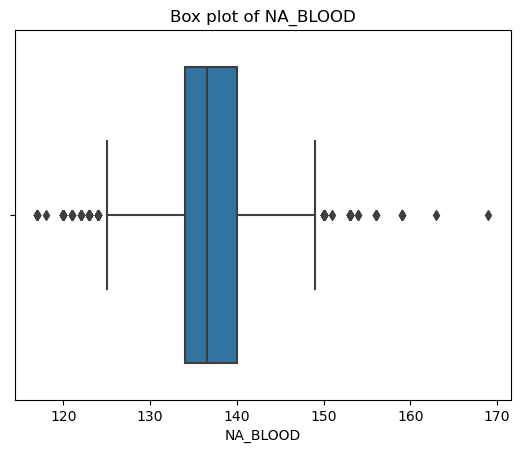

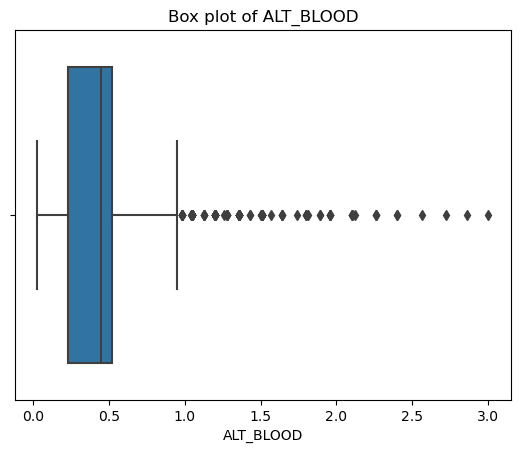

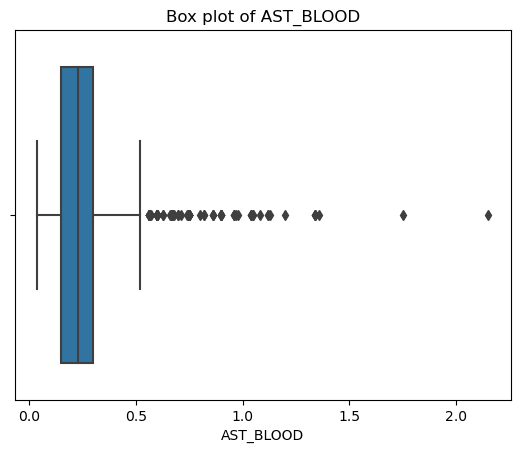

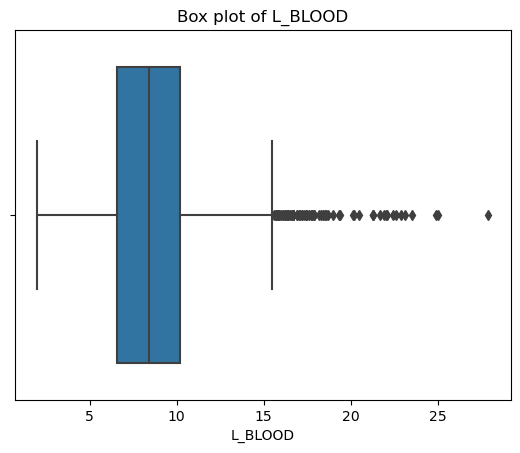

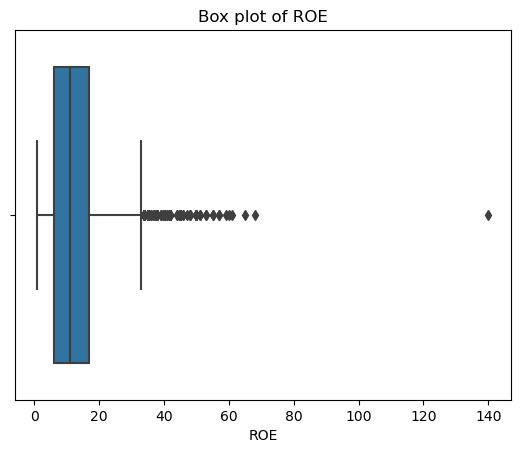

In [113]:

# Combine integer and continuous columns for outlier visualization
numeric_columns = integer_columns + continuous_columns

# Create box plots for each numerical feature
plt.figure(figsize=(12, 6))

for column in numeric_columns:
    sns.boxplot(data=data, x=column)
    plt.title(f'Box plot of {column}')
    plt.show()


###### Understanding the Outliers
- **AGE**: Most patients are between 50 and 80 years old, but there are a few younger patients around 20, which could be unusual cases.
- **Blood Pressure**: The box plots for systolic and diastolic blood pressure show some extremely high and low values, which could be mistakes or rare cases.
- **Potassium and Sodium Levels**: Most values fall within the normal range, but a few outliers suggest abnormal levels that might need attention.
- **ALT and AST**: Some high values are present, which might indicate liver issues. These outliers could affect our analysis if not treated.
- **Other Lab Values**: For measurements like `ROE`, we see some very high values. These outliers might throw off our analysis if we don't address them.
- **Why It Matters**: Outliers can distort our data and make it harder to get accurate results from models. By adjusting or capping these extreme values, we can ensure the data is more consistent and reliable for analysis.


In [114]:
# Define a function to cap outliers using the IQR method
def deal_with_outlier(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    minn = Q1 - 1.5 * IQR
    maxx = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=minn, upper=maxx)


In [115]:
for column in numeric_columns:
    deal_with_outlier(data, column)

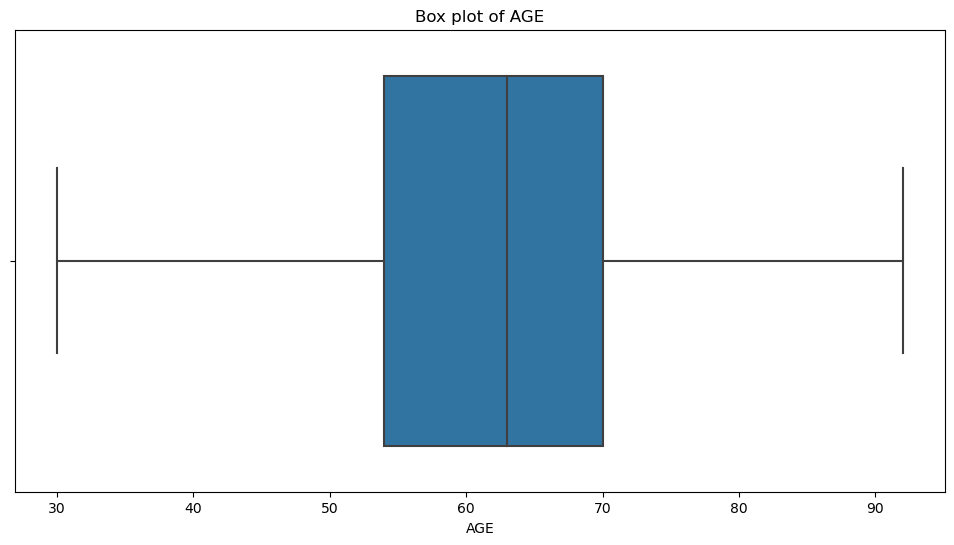

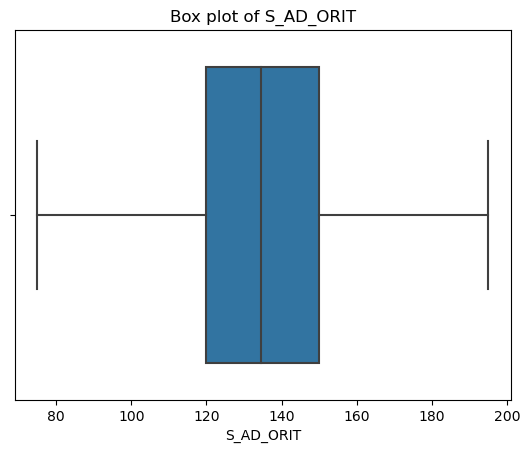

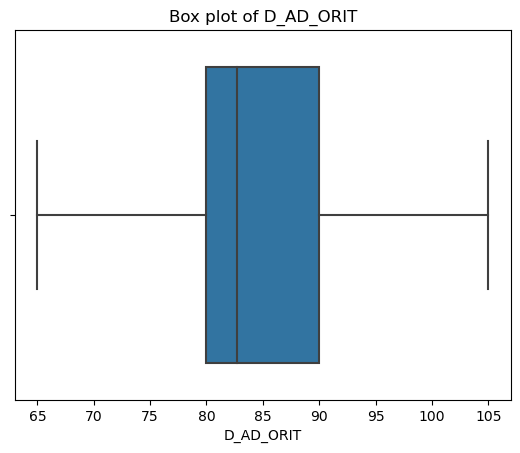

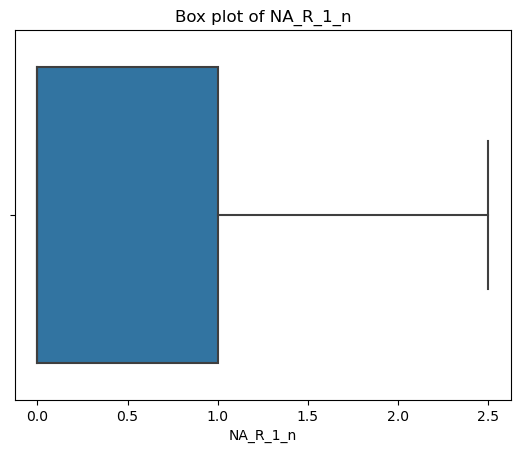

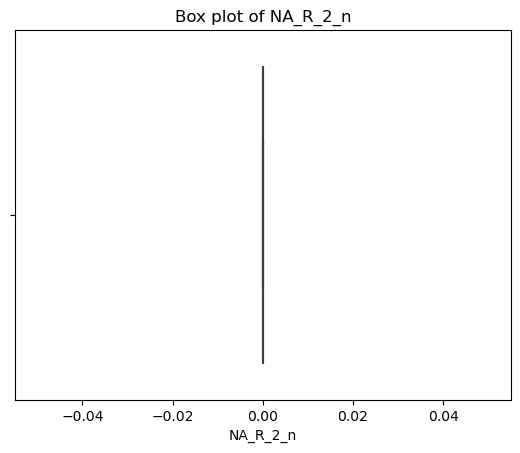

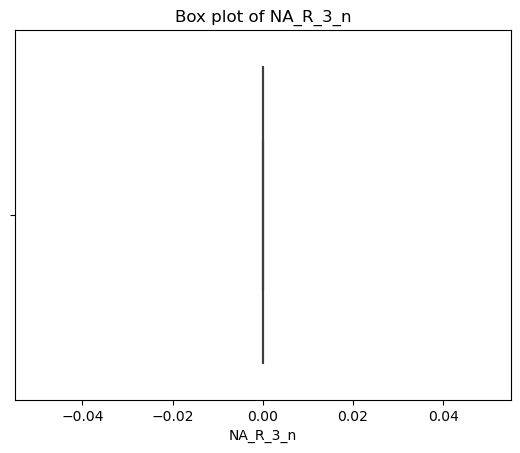

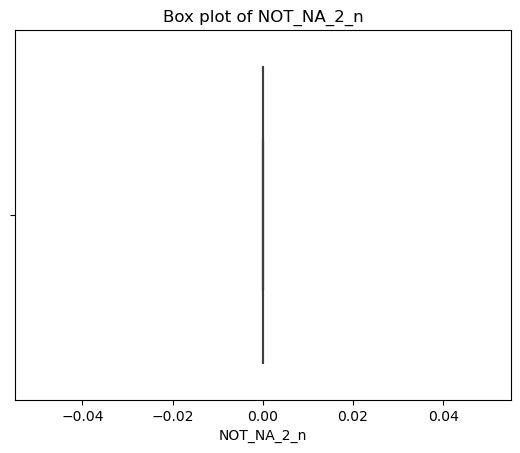

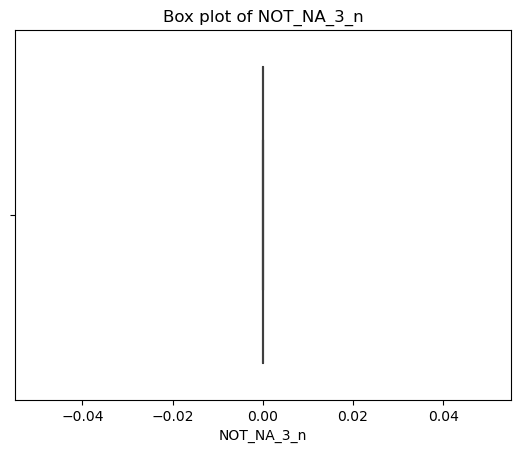

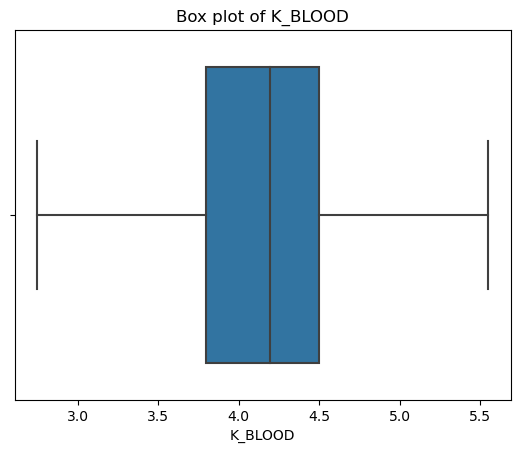

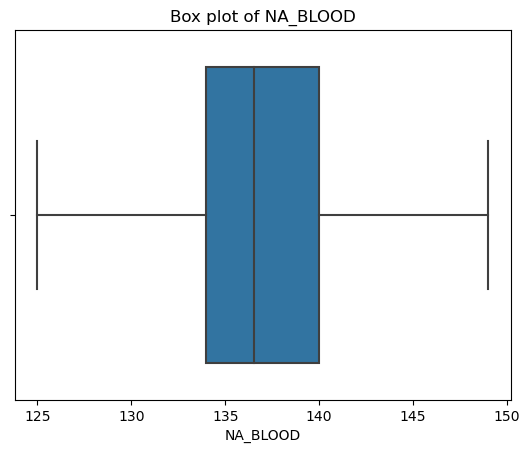

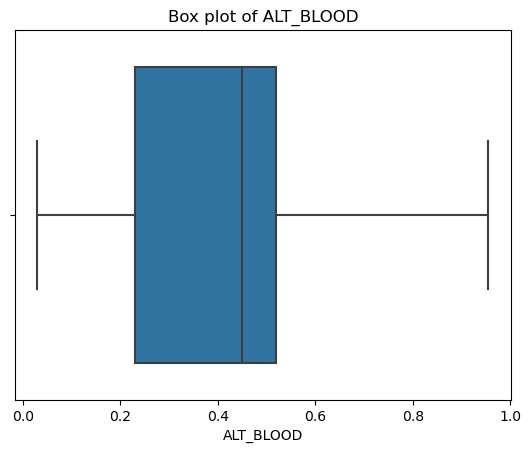

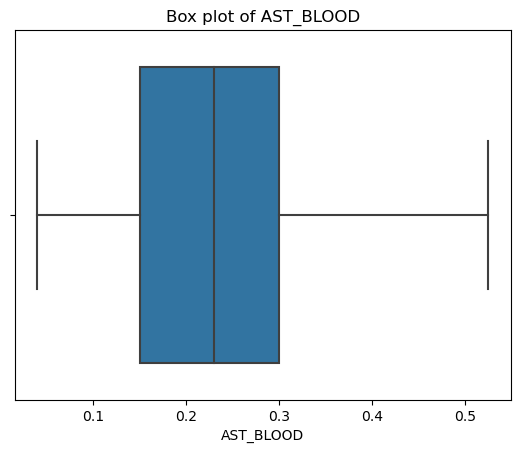

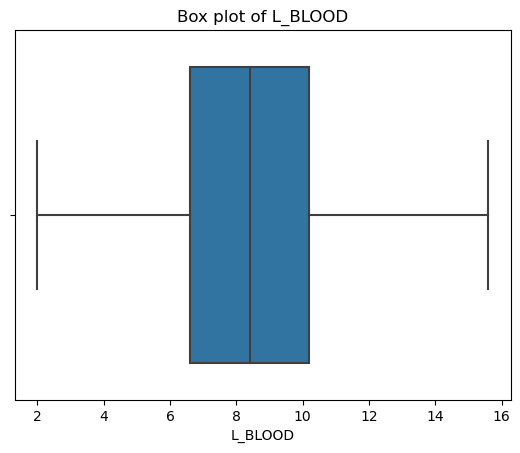

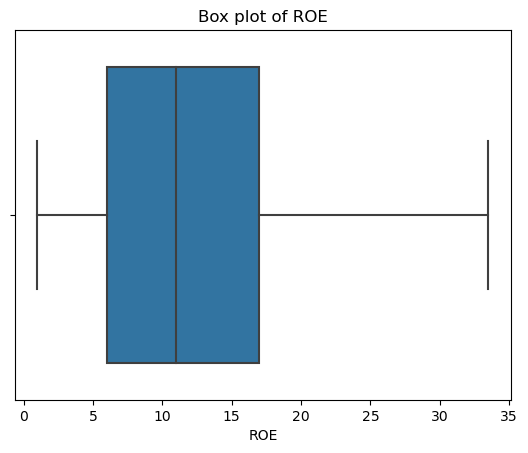

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine integer and continuous columns for outlier visualization
numeric_columns = integer_columns + continuous_columns

# Create box plots for each numerical feature
plt.figure(figsize=(12, 6))

for column in numeric_columns:
    sns.boxplot(data=data, x=column)
    plt.title(f'Box plot of {column}')
    plt.show()


### Dealing with Outliers: Why We Chose Capping
To handle the outliers in our dataset, we went with a technique called **capping**. This choice is all about balance—keeping every piece of data we have while making sure those extreme values don’t throw off our analysis. Outliers can sometimes mess with the overall results, but simply removing them means losing potentially valuable information. With capping, we adjust these extreme values so they fall within a more typical range, but we don’t lose any data points along the way. We used the **IQR (Interquartile Range)** method to determine what’s normal, focusing on the central spread of the data. Any values that strayed too far outside this range were gently nudged back into place. It’s like setting boundaries, ensuring that all data plays nicely together. This way, our results stay true to the data’s story while making sure no single value has too much influence.


### 3.Transforming Categorical Features

In [117]:
# Apply One-Hot Encoding 
copy = pd.get_dummies(data, columns=numerical_as_categorical, drop_first=True)

print("Data after applying one-hot encoding:")
copy.head()


Data after applying one-hot encoding:


,AGE,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,...,NOT_NA_1_n_2.0,NOT_NA_1_n_3.0,NOT_NA_1_n_4.0,LET_IS_1,LET_IS_2,LET_IS_3,LET_IS_4,LET_IS_5,LET_IS_6,LET_IS_7
0,77.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,52.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
3,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [118]:
print("Columns in the dataset after one-hot encoding:")
print(copy.columns.tolist())

Columns in the dataset after one-hot encoding:
['AGE', 'SEX', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT

In [119]:
data = copy 

In [120]:
data.head()

,AGE,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,...,NOT_NA_1_n_2.0,NOT_NA_1_n_3.0,NOT_NA_1_n_4.0,LET_IS_1,LET_IS_2,LET_IS_3,LET_IS_4,LET_IS_5,LET_IS_6,LET_IS_7
0,77.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,52.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
3,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [121]:
# Convert all Boolean columns to integers (0s and 1s)
data = data.astype(int)

In [122]:
data.head()

,AGE,SEX,SIM_GIPERT,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,...,NOT_NA_1_n_2.0,NOT_NA_1_n_3.0,NOT_NA_1_n_4.0,LET_IS_1,LET_IS_2,LET_IS_3,LET_IS_4,LET_IS_5,LET_IS_6,LET_IS_7
0,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this step, we transformed our categorical features to prepare the dataset for modeling. Many features in our dataset were initially stored as numbers but represented different categories. To ensure our machine learning models could understand these properly, we applied **one-hot encoding**.

  - After applying one-hot encoding, our dataset expanded from its original columns to include **179 columns**. 
  - This is because each category got its own column, allowing our models to differentiate between them.
  - The new data is richer in information and is now ready for training, ensuring that our models will be able to use the categorical information effectively.

### 4. Transforming Numerical Features to Improve Distribution
In this step, we focus on improving the distribution of our numerical features. Some of the continuous numerical data in our dataset might be **skewed**, meaning that most of the values are either too low or too high, with a few extreme values pulling the average. Skewed data can make it harder for certain machine learning models to learn properly, as they might focus too much on these extreme values. To address this, we apply **transformations** like the **log transformation**. This helps to balance the data, making it look more like a normal (bell-shaped) distribution. By doing so, we can ensure that our models have a better understanding of the data, leading to more accurate predictions.


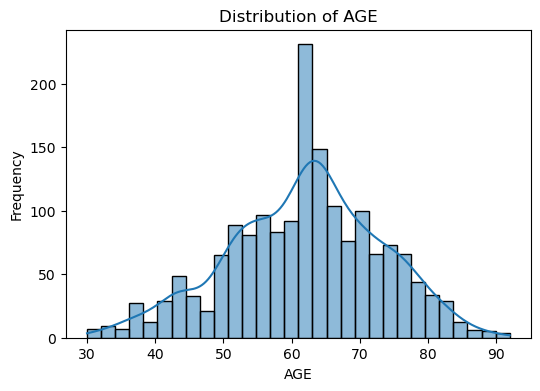

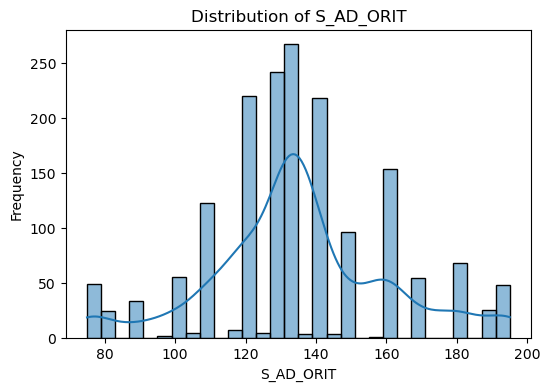

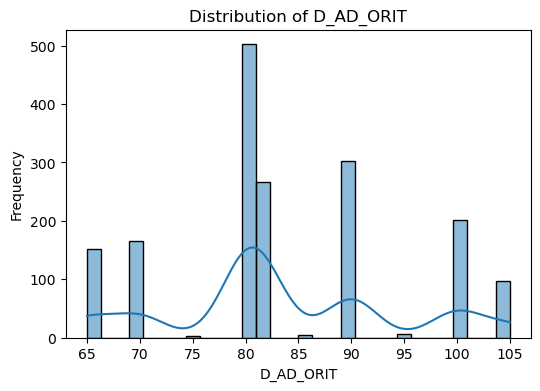

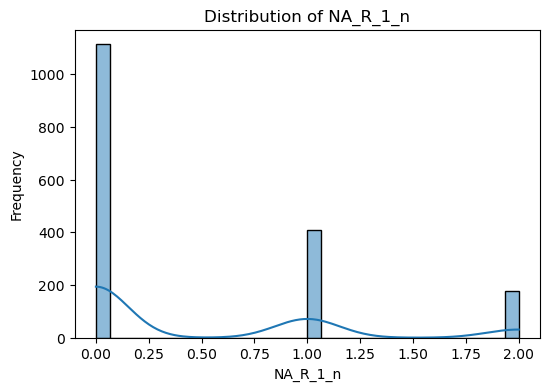

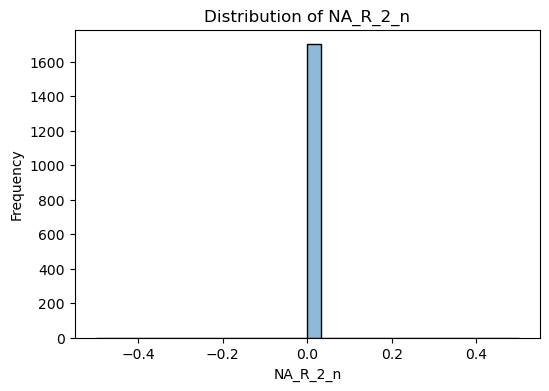

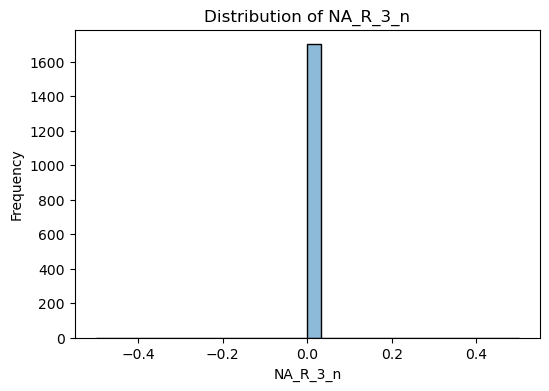

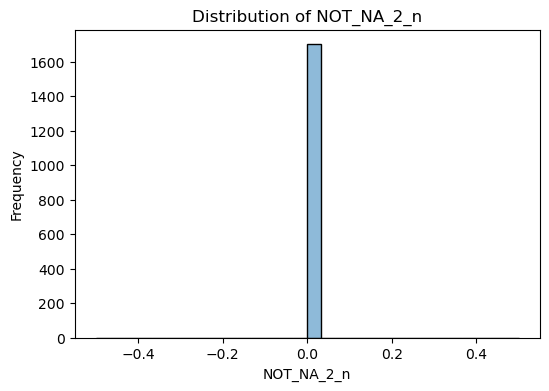

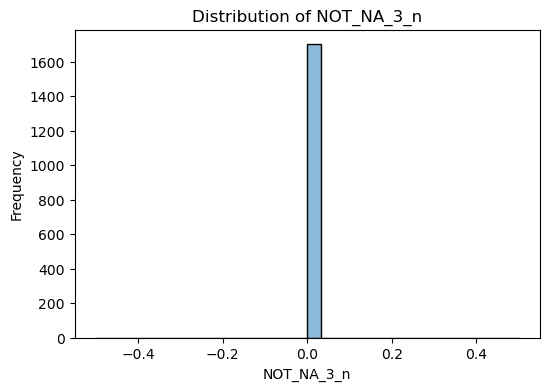

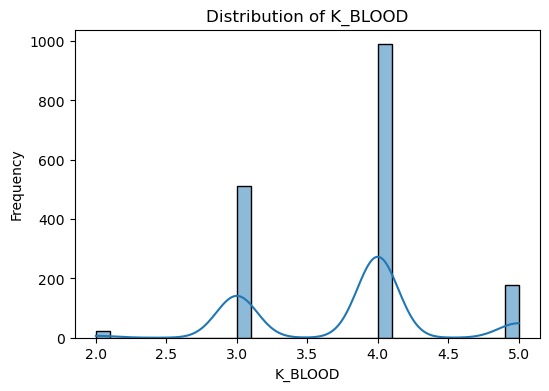

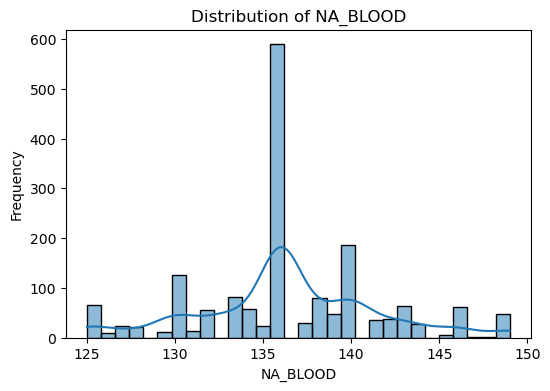

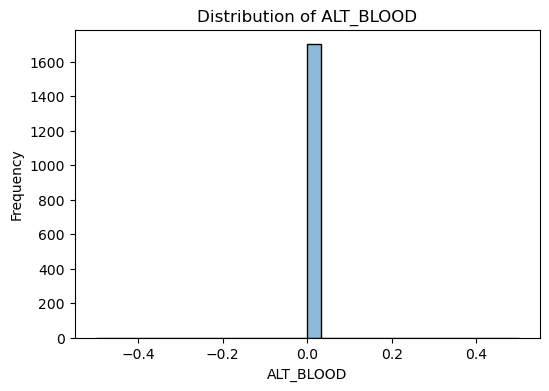

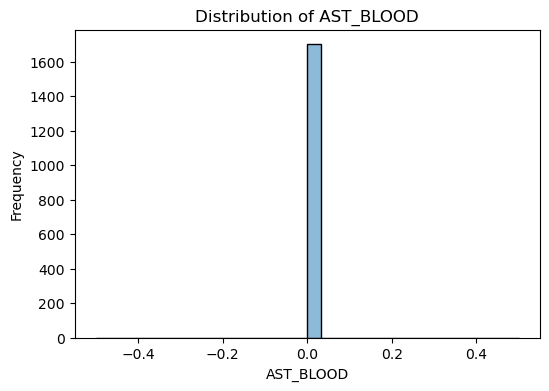

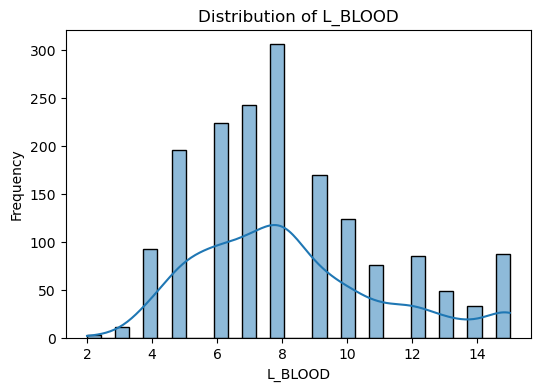

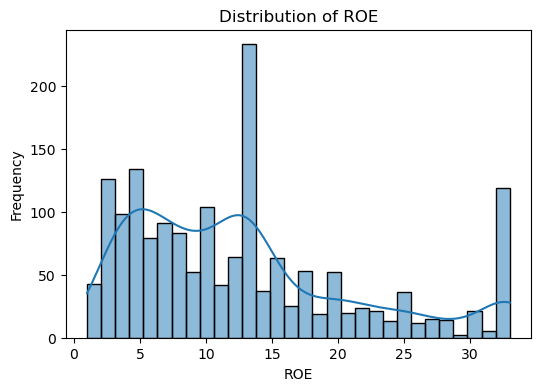

In [123]:
# Plot histograms to visualize the distribution of continuous columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [148]:
zero = 0

# Calculate the percentage of 0 in ALT_BLOOD and AST_BLOOD
alt_zero_percentage = (data['ALT_BLOOD'] == zero).mean() * 100
ast_zero_percentage = (data['AST_BLOOD'] == zero).mean() * 100
    NA_3_zero_percentage = (data['NOT_NA_3_n'] == zero).mean() * 100
NA_2_zero_percentage = (data['NOT_NA_2_n'] == zero).mean() * 100
NA_R_3_zero_percentage = (data['NA_R_3_n'] == zero).mean() * 100
NA_R_2_zero_percentage = (data['NA_R_2_n'] == zero).mean() * 100

# Display the results
print(f"Percentage of 0 values in ALT_BLOOD: {alt_zero_percentage:.2f}%")
print(f"Percentage of 0 values in AST_BLOOD: {ast_zero_percentage:.2f}%")
print(f"Percentage of 0 values in NOT_NA_3_n: {alt_zero_percentage:.2f}%")
print(f"Percentage of 0 values in NOT_NA_2_n: {ast_zero_percentage:.2f}%")
print(f"Percentage of 0 values in NA_R_3_n: {alt_zero_percentage:.2f}%")
print(f"Percentage of 0 values in NA_R_2_n: {ast_zero_percentage:.2f}%")


KeyError: 'AST_BLOOD'

### Interpretation:
- Most of the values in `ALT_BLOOD` `AST_BLOOD` `NOT_NA_3_n` `NOT_NA_2_n` `NA_R_3_n`and `NA_R_2_n` are zero. This means that these features don't change much across different rows, making them almost constant.
- Because they don't vary, they don’t give any new information that could help the model differentiate between different cases.

- It’s best to remove these columns since they don’t provide useful insights for predicting outcomes.
- This will make the data cleaner and focus the model on more meaningful features.

In [124]:
# Drop ALT_BLOOD and AST_BLOOD 
data = data.drop(columns=['ALT_BLOOD', 'AST_BLOOD', 'NOT_NA_3_n', 'NOT_NA_2_n', 'NA_R_3_n', 'NA_R_2_n'  ])

In [125]:
integer_columns = ['AGE',  'S_AD_ORIT', 'D_AD_ORIT', 'NA_R_1_n']
continuous_columns = ['K_BLOOD', 'NA_BLOOD',  'L_BLOOD', 'ROE']
numeric_columns = integer_columns + continuous_columns

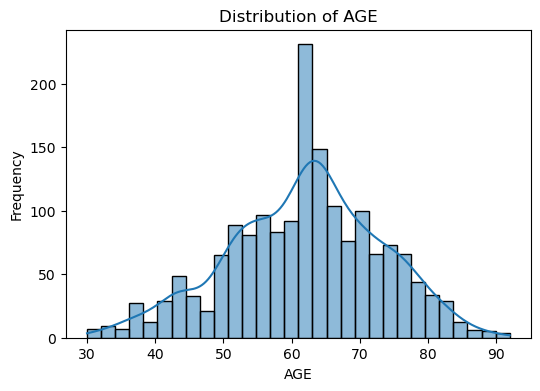

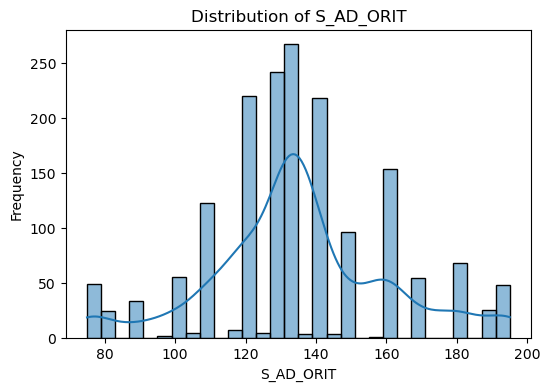

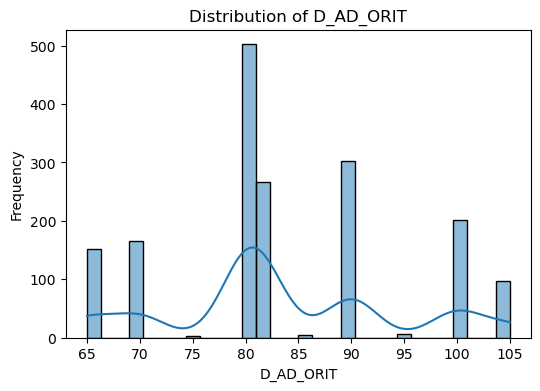

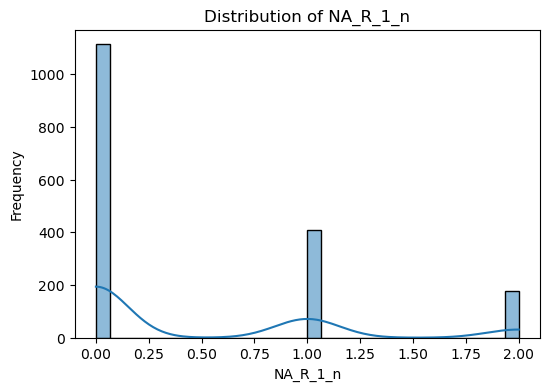

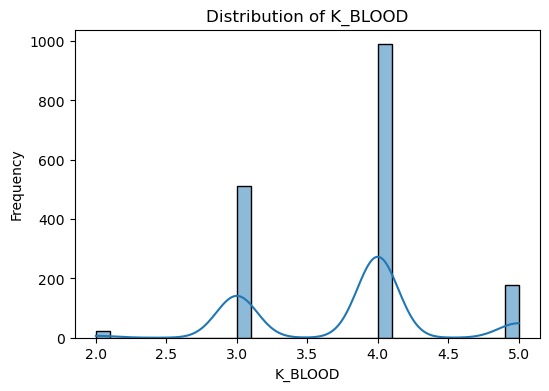

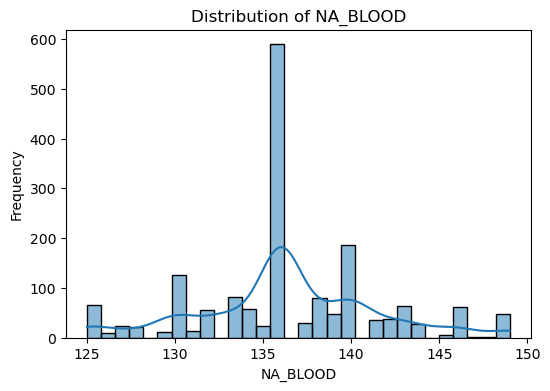

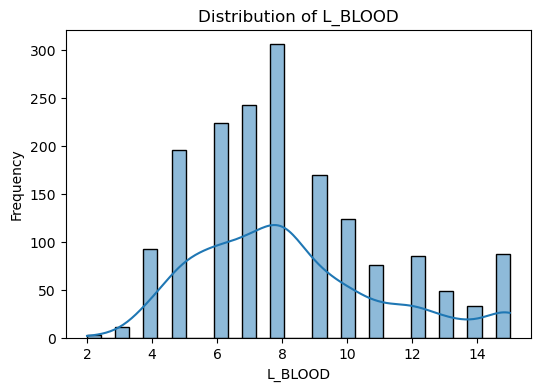

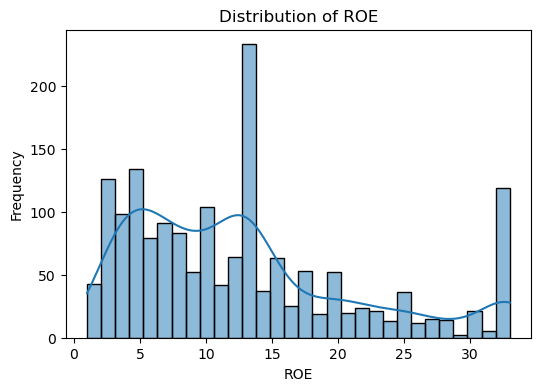

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot histograms to visualize the distribution of continuous columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [128]:
# Import necessary librarie
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [137]:
min_max_scaler = MinMaxScaler()

# Apply normalization 
data[numeric_columns] = min_max_scaler.fit_transform(data[numeric_columns])



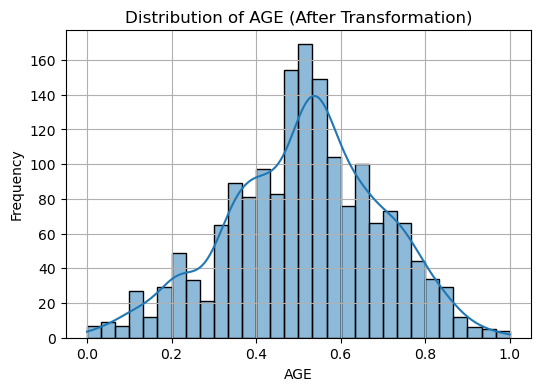

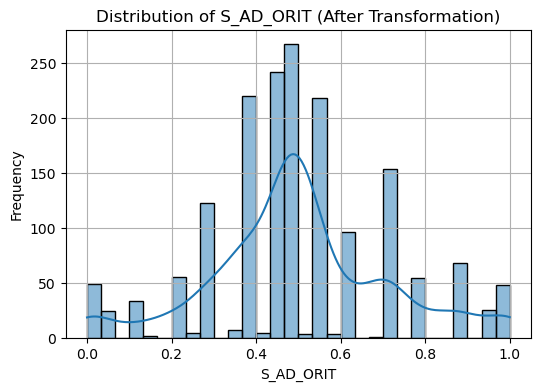

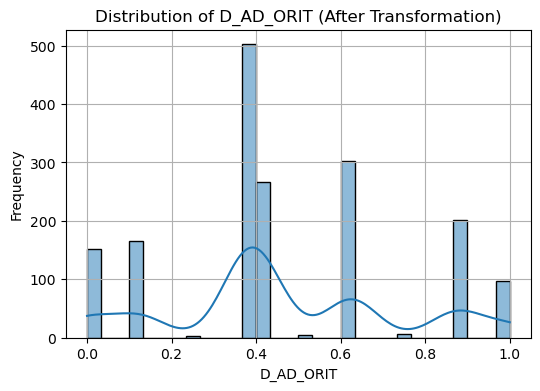

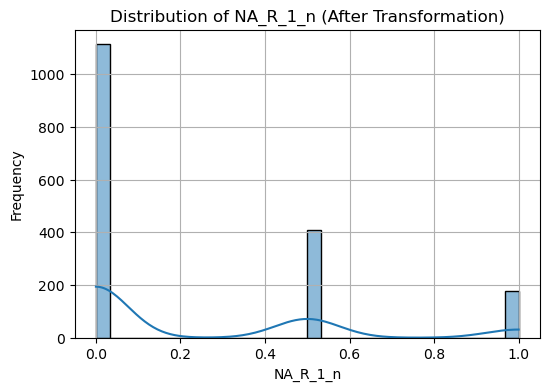

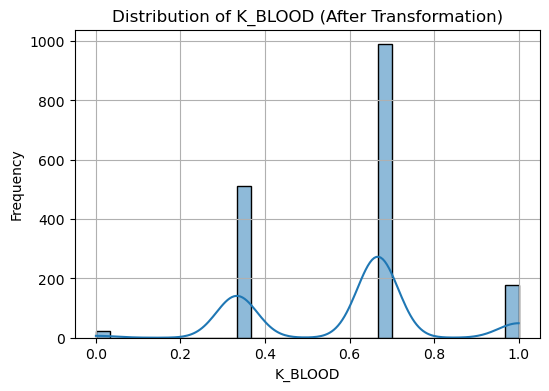

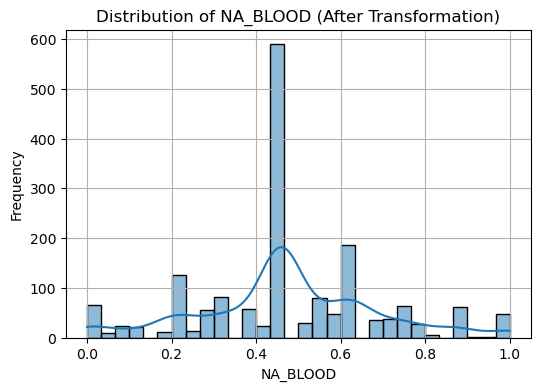

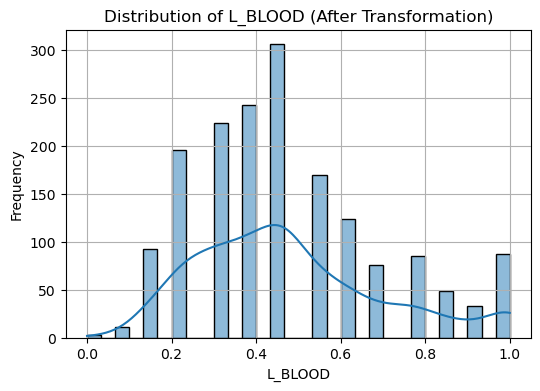

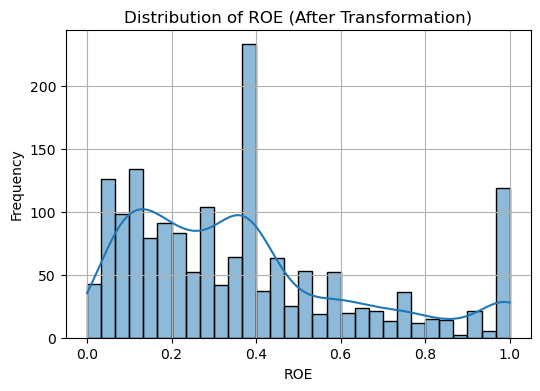

In [138]:
# Plot histograms to visualize the distribution of the transformed numeric columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (After Transformation)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



### Interpretation of Data Transformation

#### Why We Transformed the Data:


- **Normalization**:
  - we used `MinMaxScaler` to normalize columns.
  - Normalization scales values to a range between 0 and 1.
  - This is especially useful for models that calculate distances between data points (like K-Nearest Neighbors and neural networks), as it ensures no feature dominates because of its range.

#### Why This Is Important:
- **Improves Model Training**:
  - normalizing the features allows the model to learn faster and perform better because each feature contributes equally.
  - It prevents features with larger ranges (like `AGE` or blood levels) from having too much influence compared to smaller ranged features.
  
- **Visualizing the Results**:
  - We plotted histograms for each feature after transformation to ensure that the scaling worked as expected.
  - This step is important to verify that our data is now in a suitable form for model training.
  - The histograms show us how the distribution of each feature has changed after applying the transformations, helping us confirm that the data is now centered or scaled properly.



# Feature Engineering:
We will create new features based on existing columns to enhance the information available to the model:

**Age Category**: Initially, our goal was to categorize `AGE` into groups like `young`, `middle-aged`, `senior`, and `elderly`. However, after applying **normalization** to the `AGE` column, we lost access to the original values that represent actual ages in years. Normalization scales all values to a range between `0` and `1`, which makes it impossible to create meaningful age categories based on years like `0-40`, `40-60`, etc., since the actual age values have been transformed into a new scale.

To create age categories, we would need the original, non-normalized age values. Since those values are not available, we cannot proceed with this step using the normalized `AGE` values.

### Command to Create Age Categories (For Reference):
If we had access to the original `AGE` values, the code would look like this:

```python
# Assuming 'AGE_ORIGINAL' is the column with original age values
data['AGE_GROUP'] = pd.cut(
    data['AGE_ORIGINAL'],
    bins=[0, 40, 60, 80, 100],
    labels=['Young', 'Middle-aged', 'Senior', 'Elderly']
)


In [147]:
from IPython.display import HTML

# Display a GIF from a local file with specified width and height
HTML('<img src="thank_you.gif" width="1000" height="10">')
